## Set Up

In [39]:
# Read in dat
import ggplot
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
import matplotlib
from sklearn import metrics
matplotlib.style.use('ggplot')
%matplotlib inline

data = pd.read_csv('~/top5europe.csv')
df = data
#import the module so that we can tables when printing dataframes
from IPython.display import display, HTML
pd.options.mode.chained_assignment = None

## Data Preparation

Mapped out the countries in Europe with the five highest life expectancies (Switzerland, Spain, Italy, Iceland, France) to have a corresponding number (1, 2, 3, 4, 5 respectively) based on their rank.  Removed the one outlier ridiculously high rate.

In [40]:
df1 = df
df1['location_name'] = df1['location_name'].map({'Switzerland': 1, 'Spain': 2, 'Italy': 3, 'Iceland': 4, 'France': 5})
df1 = df1[df1.val < 50]
df1.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,rei_id,rei_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,83,4,1,Male,26,70+ years,526,Digestive diseases,169,All risk factors,3,Rate,2015,1.959772,2.896562,1.291545
1,1,Deaths,83,4,1,Male,26,70+ years,586,"Diabetes, urogenital, blood, and endocrine dis...",110,Dietary risks,3,Rate,2015,25.228970,35.348261,16.803548
2,1,Deaths,83,4,1,Male,26,70+ years,586,"Diabetes, urogenital, blood, and endocrine dis...",111,Diet low in fruits,3,Rate,2015,3.876016,7.638902,0.784222
3,1,Deaths,83,4,1,Male,26,70+ years,586,"Diabetes, urogenital, blood, and endocrine dis...",113,Diet low in whole grains,3,Rate,2015,4.596448,8.001574,2.265042
4,1,Deaths,83,4,1,Male,26,70+ years,586,"Diabetes, urogenital, blood, and endocrine dis...",114,Diet low in nuts and seeds,3,Rate,2015,4.988863,7.972121,2.411347


## Describing Data Structure

In [41]:
shape = df1.shape
print "Size: %s" % (shape,)
print "Variables: Location (str), Sex (str), Age (str), Cause of Death (str), Risk Factors (str), Average Rate (int)"

Size: (731, 18)
Variables: Location (str), Sex (str), Age (str), Cause of Death (str), Risk Factors (str), Average Rate (int)


## Univariate Analysis

In [42]:
df1.describe()

,measure_id,location_id,location_name,sex_id,age_id,cause_id,rei_id,metric_id,year,val,upper,lower
count,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0,731.0,731.000000,731.000000,731.000000
mean,1.0,87.012312,2.997264,1.510260,23.775650,419.663475,127.180575,3.0,2015.0,5.454289,8.731446,2.846727
std,0.0,5.307902,1.419046,0.500237,4.786283,138.198156,21.332853,0.0,0.0,9.567248,15.070789,5.767767
min,1.0,80.000000,1.000000,1.000000,1.000000,294.000000,110.000000,3.0,2015.0,0.000004,0.000036,0.000000
25%,1.0,83.000000,2.000000,1.000000,24.000000,294.000000,114.000000,3.0,2015.0,0.157573,0.259155,0.067334
50%,1.0,86.000000,3.000000,2.000000,25.000000,294.000000,118.000000,3.0,2015.0,1.040344,1.749419,0.439343
75%,1.0,92.000000,4.000000,2.000000,25.000000,586.000000,124.000000,3.0,2015.0,5.942234,9.822360,2.388055
max,1.0,94.000000,5.000000,2.000000,26.000000,586.000000,169.000000,3.0,2015.0,49.584470,81.144145,43.794091


## Univariate Analysis by Category

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb1fde1cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbb1fa08910>]], dtype=object)

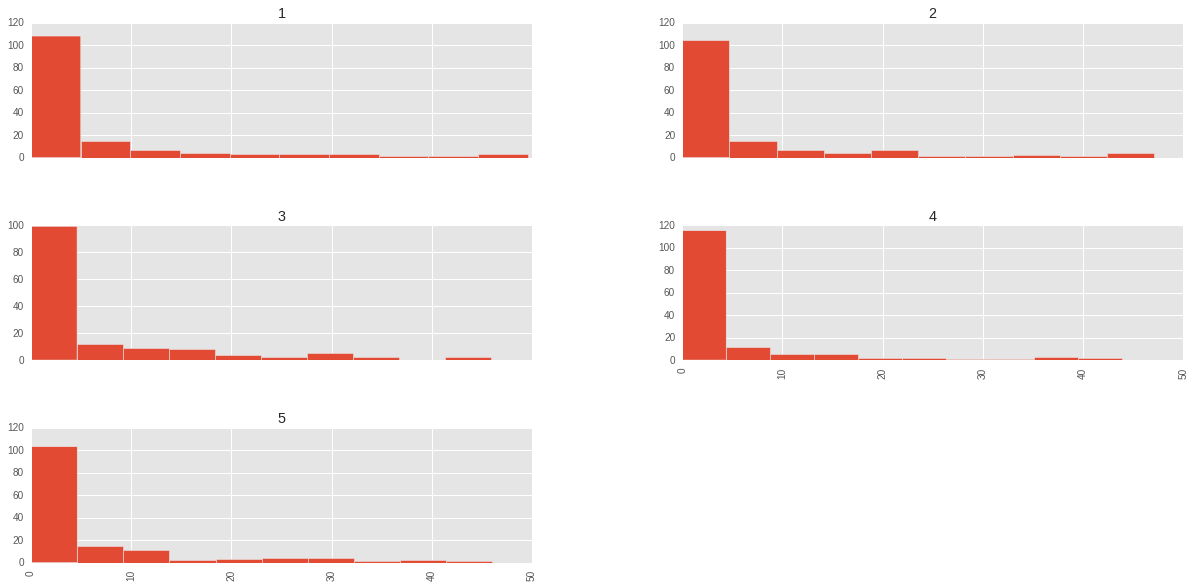

In [43]:
#ax = df1['val'].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
#ax.set_xlabel("Hour", fontsize=12)
#ax.set_ylabel("V", fontsize=12)
#plt.show()

df1['val'].hist(by=df1['location_name'], sharex=True, figsize=(20,10))

## Bivariate analysis

In [45]:
lm = smf.glm(formula = 'location_name ~ val', data=df1, family=sm.families.Poisson()).fit()
df1['lm'] = lm.predict()

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          location_name   No. Observations:                  731
Model:                            GLM   Df Residuals:                      729
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1312.6
Date:                Fri, 03 Mar 2017   Deviance:                       528.25
Time:                        09:04:46   Pearson chi2:                     490.
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1029      0.025     44.895      0.000         1.055     1.151
val           -0.0010      0.002     -0.429      0.668        -0.005     0.003
==============================================================================
"""

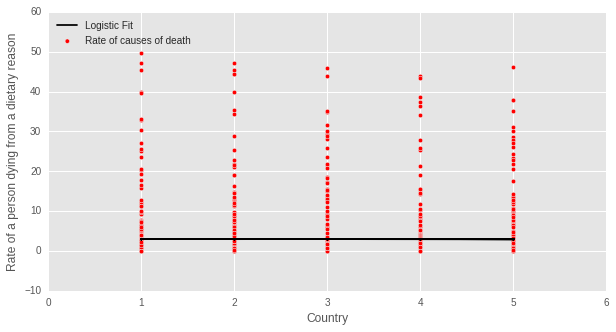

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df1.location_name, df1.val, c='red', label="Rate of causes of death")
ax.plot(df1.location_name, df1.lm, c='black', label="Logistic Fit")
ax.legend(numpoints=1, loc='upper left')
ax.set_xlabel('Country')
ax.set_ylabel('Rate of a person dying from a dietary reason')
plt.show()

## Summary of Insights

We're trying to look if certain dietary restrictions or changes significantly affect a life expectancy.  I took the highest 5 life expectancies by country in Europe and took a look at their rates of deaths caused by different dietary means to see if it correlated with their corresponding life expectancy ranks.  In the univariate analysis, we can see that Iceland has higher rates of dietary related deaths than the other countries, but is still ranked higher than France.

In my bivariate analysis where I ran a poisson regression, there doesn't seem to be any correlation between the dietary causes of deaths and the life expectancy.  However, it would be interesting to compare the highest life expectancy countries with the lowest life expectancy countries.  Or just countries that have more variation in living conditions compared to the five chosen in my report.  